In [1]:
from cebra import KNNDecoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse.linalg import svds

In [2]:
df = pd.read_hdf("data/ID18150/Day2/DataFrame_Imaging_dFF_18150_day2.h5")

In [3]:
# Get a list of columns whose names are of numerical type
numerical_columns = [col for col in df.columns if type(col) == int]

#Feature matrix
X = df[numerical_columns].values
t = df.Time.to_list()

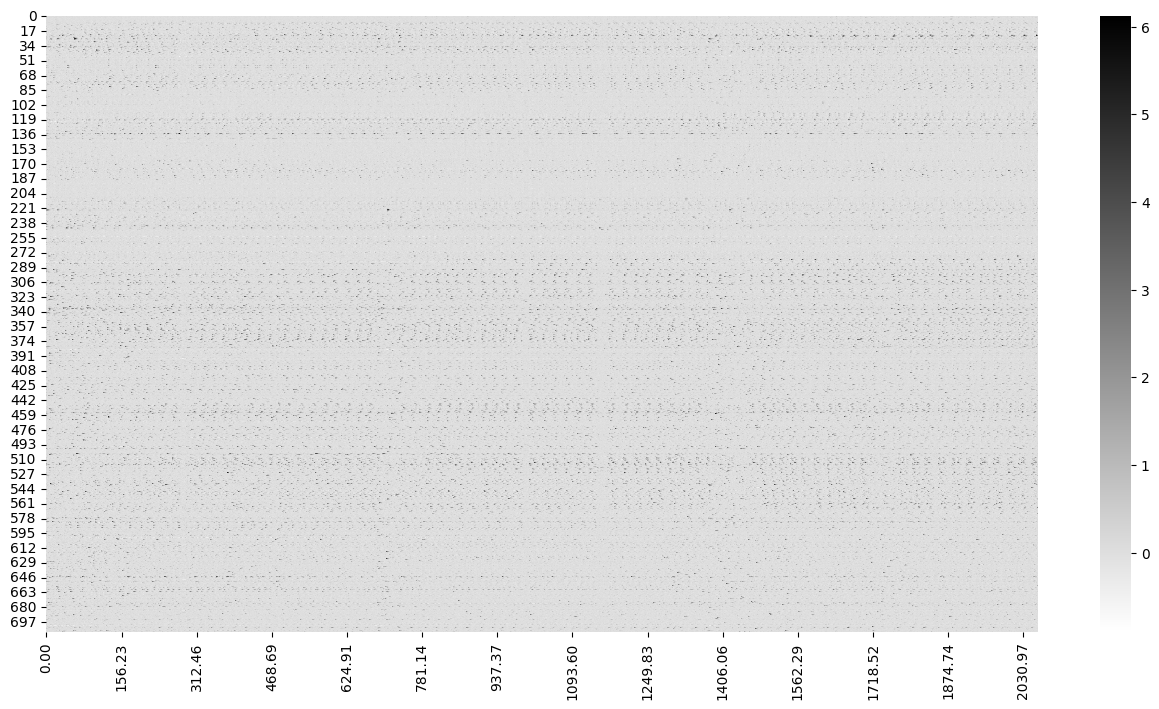

In [8]:
plt.figure(figsize=(16, 8))
delta = 5000
x_ticks = np.arange(0,X.shape[0],delta)
x_tick_labels = [f"{t[i]:.2f}" for i in x_ticks]
ax = sns.heatmap(X.T, cmap = "gray_r")
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)
plt.show()

## Raw Data KNN Decoding

In [39]:
decoder = KNNDecoder(n_neighbors=36, metric="cosine").fit(X, df["Pump"].values)
Z = decoder.predict(X)
decoder.score(X, df["Pump"].values)

0.8124382261029712

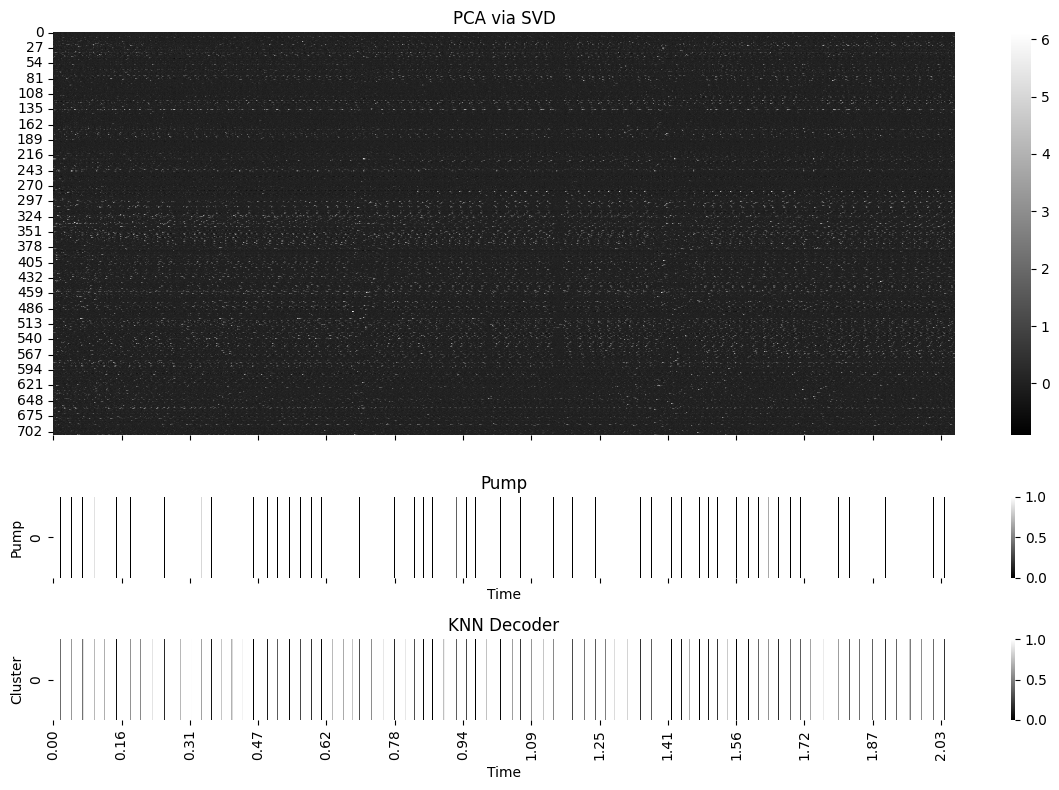

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]})

sns.heatmap(X.T, ax=ax1, cmap='gray')
ax1.set_title('Raw Data')
ax1.set_xticks(x_ticks)

# Plot Pump data
sns.heatmap(1 - df['Pump'].values.reshape(1, -1), ax=ax2, cmap='gray')
ax2.set_xlabel('Time')
ax2.set_ylabel('Pump')
ax2.set_title('Pump')
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_tick_labels)

#Plot Kmeans classification over time
sns.heatmap(Z.reshape(1, -1), ax=ax3, cmap='gray_r')
ax3.set_xlabel('Time')
ax3.set_ylabel('Cluster')
ax3.set_title('KNN Decoder')
ax3.set_xticks(x_ticks)
ax3.set_xticklabels(x_tick_labels)

plt.tight_layout()
plt.show()

## PCA via SVD

In [36]:
k = 8
U, S, Vt = svds(X, k=k)
P = U @ np.diag(S)
P.shape

(65994, 8)

In [37]:
decoder = KNNDecoder(n_neighbors=36, metric="cosine").fit(P, df["Pump"].values)
Z = decoder.predict(P)
decoder.score(P, df["Pump"].values)

0.7625204650900266

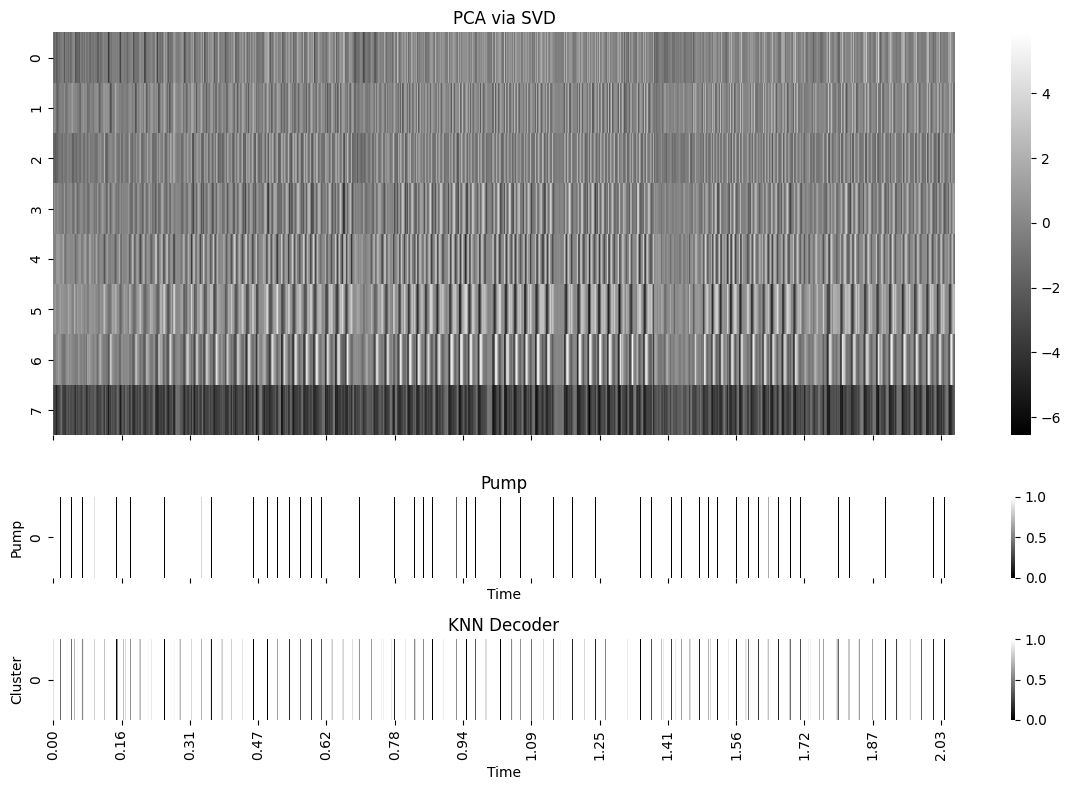

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [5, 1, 1]})

sns.heatmap(P.T, ax=ax1, cmap='gray')
ax1.set_title('PCA via SVD')
ax1.set_xticks(x_ticks)

# Plot Pump data
sns.heatmap(1 - df['Pump'].values.reshape(1, -1), ax=ax2, cmap='gray')
ax2.set_xlabel('Time')
ax2.set_ylabel('Pump')
ax2.set_title('Pump')
ax2.set_xticks(x_ticks)
ax2.set_xticklabels(x_tick_labels)

#Plot Kmeans classification over time
sns.heatmap(1 - Z.reshape(1, -1), ax=ax3, cmap='gray')
ax3.set_xlabel('Time')
ax3.set_ylabel('Cluster')
ax3.set_title('KNN Decoder')
ax3.set_xticks(x_ticks)
ax3.set_xticklabels(x_tick_labels)

plt.tight_layout()
plt.show()